# Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

# tf.Tensor (Tensorflow Tensor)
- **기본 Tensor 타입**으로, TensorFlow 연산에서 다루는 **실제 데이터**를 담고 있음.

- 연산 그래프에서 **계산 가능**한 값이며, Numpy처럼 연산이 가능한 다차원 배열.

- `tf.constant()`, `tf.Variable()`, 또는 어떤 '연산'의 결과로 만들어짐.

- https://www.tensorflow.org/api_docs/python/tf/Tensor

In [2]:
tf.constant([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [3]:
tensor = tf.constant(((1, 2, 3), (4, 5, 6)))
tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [4]:
tensor.shape

TensorShape([2, 3])

In [5]:
tensor.ndim

2

In [6]:
tensor.dtype

tf.int32

In [7]:
tensor.numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [8]:
np.array(tensor)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [9]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [10]:
tf.range(3, 5, 0.5, dtype=tf.float32)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([3. , 3.5, 4. , 4.5], dtype=float32)>

In [11]:
tf.random.normal([9])  # 정규 분포 난수

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([ 1.0225666 , -1.6546986 , -1.9482735 ,  0.10531271, -1.2548821 ,
       -1.5127459 ,  1.2009346 ,  2.2531276 ,  0.12222735], dtype=float32)>

In [12]:
tf.random.normal([3, 3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.6839839 , -0.84492874,  0.33408284],
       [-0.30602154, -0.37641296,  1.15603   ],
       [-0.5982221 , -1.8531471 , -0.3354489 ]], dtype=float32)>

In [13]:
tf.random.uniform([4, 4])  # 균등 분포 난수 [0, 1)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.42170024, 0.7020639 , 0.8529568 , 0.1855334 ],
       [0.12917471, 0.75085247, 0.62403524, 0.795012  ],
       [0.81878376, 0.1903143 , 0.45710015, 0.45619106],
       [0.6290935 , 0.2657665 , 0.12435472, 0.44931626]], dtype=float32)>

In [14]:
tf.random.set_seed(42)
tf.random.uniform([4, 4])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 , 0.46448255],
       [0.03366041, 0.68467236, 0.74011743, 0.8724445 ],
       [0.22632635, 0.22319686, 0.3103881 , 0.7223358 ],
       [0.13318717, 0.5480639 , 0.5746088 , 0.8996835 ]], dtype=float32)>

# `:` slicing & `...` ellipse

## `:` (콜론)
- `:` 는 **파이썬의 슬라이싱 문법**과 같다.
- 특정 축에 대해 시작/끝/스텝 범위를 지정할 수 있어요.


In [15]:
tensor = tf.reshape(tf.range(24), (2, 3, 4))

print(tensor)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]], shape=(2, 3, 4), dtype=int32)


In [16]:
tensor[:, 0, :]

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]], dtype=int32)>

# `...` (ellipsis, 줄여서 점 세 개)

- `...` 는 **나머지 모든 차원에 대해 전체를 가져오라**는 뜻.
- 특히 **차원이 많을 때 편하게 쓰기 위해** 사용됨.

In [17]:
tensor[0, :, :]

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

In [18]:
tensor[0, ...]

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

# expand_dims(), tf.newaxis
- 차원 추가
- 주로 사용되는 경우
  - batch dimension 등을 맞출때
  - broadcasting : 계산하기 전에 맞춰야 할때

In [19]:
x = tf.constant([1, 2, 3, 4])
x

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [20]:
tf.expand_dims(x, axis=0)   # (4,) => (1, 4)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 2, 3, 4]], dtype=int32)>

In [21]:
tf.expand_dims(x, axis=1)   # (4,) => (4, 1)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [22]:
tf.expand_dims(x, axis=-1)  # (4,) => (4, 1)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [23]:
x[:]

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [24]:
x[tf.newaxis, :]   # (4,) => (1, 4)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 2, 3, 4]], dtype=int32)>

In [25]:
x[tf.newaxis, :, tf.newaxis]  # (4,) => (1, 4, 1)

<tf.Tensor: shape=(1, 4, 1), dtype=int32, numpy=
array([[[1],
        [2],
        [3],
        [4]]], dtype=int32)>

In [26]:
x[...]

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [27]:
x2 = x[tf.newaxis, ..., tf.newaxis]
x2

<tf.Tensor: shape=(1, 4, 1), dtype=int32, numpy=
array([[[1],
        [2],
        [3],
        [4]]], dtype=int32)>

# tf.squeeze

In [28]:
tf.squeeze(x2)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

# tf.transpose()

In [29]:
x = tf.constant([
    [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]],

    [[13, 14, 15, 16],
     [17, 18, 19, 20],
     [21, 22, 23, 24]]
])

x

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [30]:
tf.transpose(x, perm=[1, 0, 2])

<tf.Tensor: shape=(3, 2, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [13, 14, 15, 16]],

       [[ 5,  6,  7,  8],
        [17, 18, 19, 20]],

       [[ 9, 10, 11, 12],
        [21, 22, 23, 24]]], dtype=int32)>

# 🟦 CNN 신경망

# 데이터 준비

In [31]:
(train_input, train_target), (test_input, test_target) = \
      keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
train_input.shape

(60000, 28, 28)

In [33]:
# TF CNN 입력은 (batch, height, width, channel) 형태 이어야 한다
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0   # 0~255 => 0~1

In [34]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = \
  train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [35]:
train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

# 모델 정의

In [36]:
model = keras.Sequential()

# 1. Feature Extraction

# 입력 차원 지정 (28, 28, 1)
model.add(keras.layers.Input(shape=(28, 28, 1)))   # (height, width, channel)

# Conv2D
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

# MaxPooling2D
model.add(keras.layers.MaxPooling2D(pool_size=2))

# Conv2D
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))

# MaxPooling2D
model.add(keras.layers.MaxPooling2D(pool_size=2))

# 2. Classification

# Flatten
model.add(keras.layers.Flatten())  # 입력 (7, 7, 64) -> (3136,)

# hidden layer
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dropout(rate=0.4))

model.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

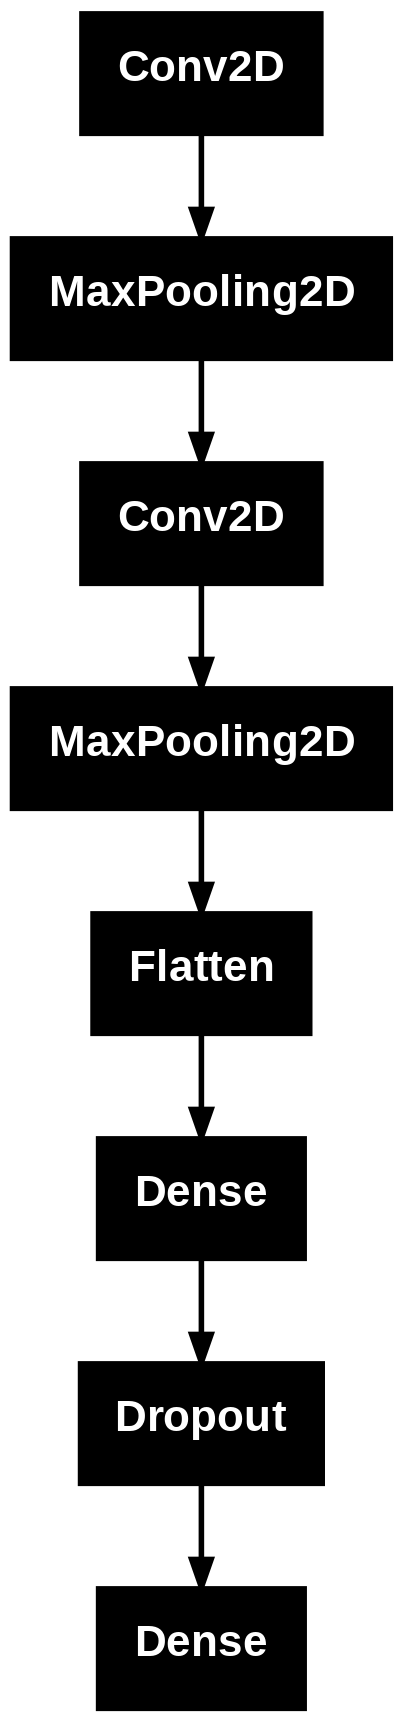

In [38]:
keras.utils.plot_model(model)

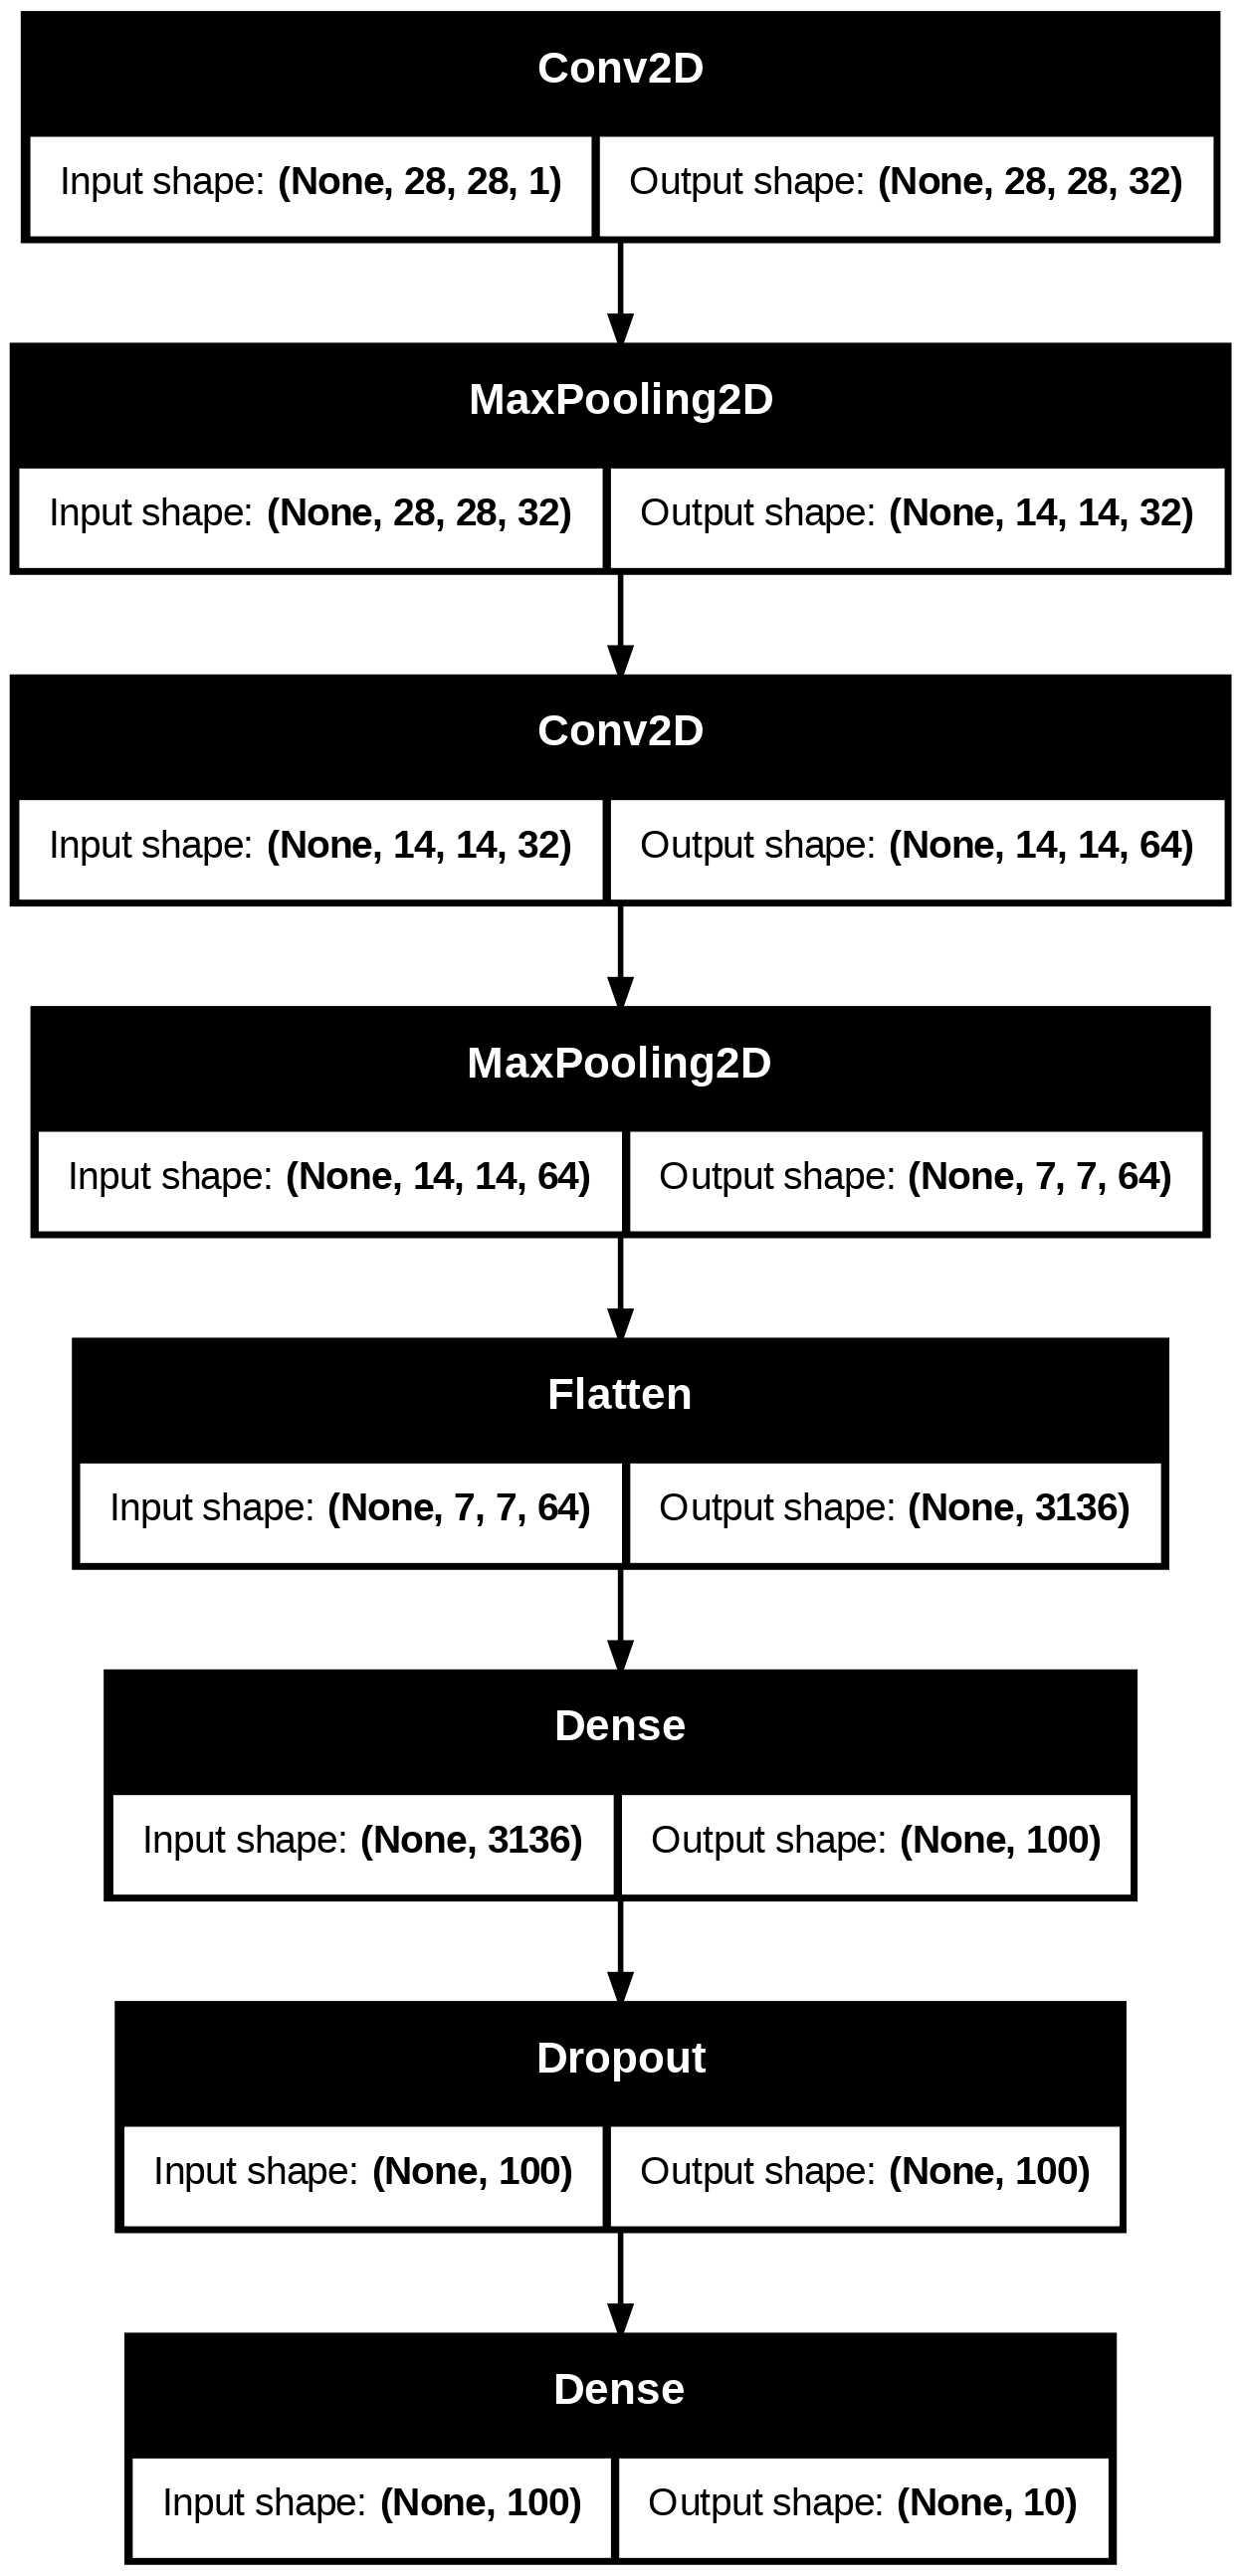

In [39]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architect.png', dpi=200)

# 모델 컴파일

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback 콜백

In [41]:
# 콜백(callback) 은 '훈련 과정 중간' 에 어떤 작업을 수행할 수 있게 하는 객체
# fit() 의 callbacks= 매개변수로 전달하여 사용 (list)

## ModelCheckpoint 콜백

**tf.keras.callbacks.ModelCheckpoint**

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

```python
tf.keras.callbacks.ModelCheckpoint(
    filepath,  # 모델 저장 경로
    monitor='val_loss',
    verbose=0,
    save_best_only=False,  # True 이면 가장 낮은 검증 점수를 만드는 모델을 저장
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)
```

In [42]:
# ModelCheckPoint 콜백은 기본적으로 에포크마다 모델을 저장한다
#  save_best_only = True  지정하면 가장 낮은 검증 점수를 만드는 모델만 저장할 수 있다.


In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)

## Early stopping(조기종료)

**tf.keras.callbacks.EarlyStopping**

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

```python
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
```

In [44]:
# 검증점수가 상승하기 시작하면 overfit 이 커지기 때문에
# 훈련을 계속할 필요가 없으므로!  훈련을 중지하여 컴퓨터의 시간과 자원 절약 가능.

# overfit 발생되기 전에 조기종료(early stopping)
# 조기종료 또한 규제(refularization) 의 한가지 방법.


In [45]:
# patience=
#    검증점수가 향상되지 않더라도 좀더 참고 수행할 에포크 횟수 지정.

# restore_best_weights=
#     True 로 지정하면 가장 낮은 검증 손실을 낸 파라미터로 되돌린다.


In [46]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 학습

In [47]:
history = model.fit(train_scaled, train_target, epochs=20,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7332 - loss: 0.7275 - val_accuracy: 0.8794 - val_loss: 0.3242
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.3640 - val_accuracy: 0.8978 - val_loss: 0.2754
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8903 - loss: 0.3081 - val_accuracy: 0.9043 - val_loss: 0.2533
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9015 - loss: 0.2689 - val_accuracy: 0.9123 - val_loss: 0.2404
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9094 - loss: 0.2426 - val_accuracy: 0.9127 - val_loss: 0.2408
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9168 - loss: 0.2233 - val_accuracy: 0.9182 - val_loss: 0.2278
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9230 - loss: 0.2067 - val_accuracy: 0.9146 - val_loss: 0.2402
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9297 - loss: 0.1902 -

In [48]:
# ↑ 훈련을 마치고 나면 몇번째 에포크에서 훈련이 중지 되었는지
# EarlyStopping 객체의 stopped_epoch 속성에서 확인 가능하다

early_stopping_cb.stopped_epoch  # (0-base)


7

# History 객체

In [49]:
# fit() 메소드의 리턴값 => History 객체
# History 객체에는 훈련과정에서 계산한 지표, 즉 loss 와 accuracy 값이 저장되어 있다.


In [50]:
history.history

{'accuracy': [0.8106250166893005,
  0.8760625123977661,
  0.8950416445732117,
  0.9049791693687439,
  0.9133958220481873,
  0.9203541874885559,
  0.9268749952316284,
  0.9336666464805603],
 'loss': [0.5250985622406006,
  0.3453652262687683,
  0.2949050962924957,
  0.2602423429489136,
  0.23537911474704742,
  0.21505658328533173,
  0.19800953567028046,
  0.18178312480449677],
 'val_accuracy': [0.8794166445732117,
  0.8977500200271606,
  0.9043333530426025,
  0.9123333096504211,
  0.9126666784286499,
  0.9181666374206543,
  0.9145833253860474,
  0.918749988079071],
 'val_loss': [0.32420220971107483,
  0.27543139457702637,
  0.2532649040222168,
  0.24037611484527588,
  0.24081359803676605,
  0.22777581214904785,
  0.24019140005111694,
  0.23010119795799255]}

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# 손실곡선

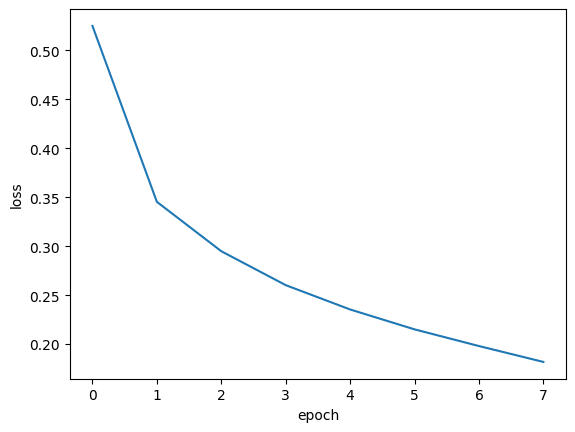

In [52]:
# Training loss

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


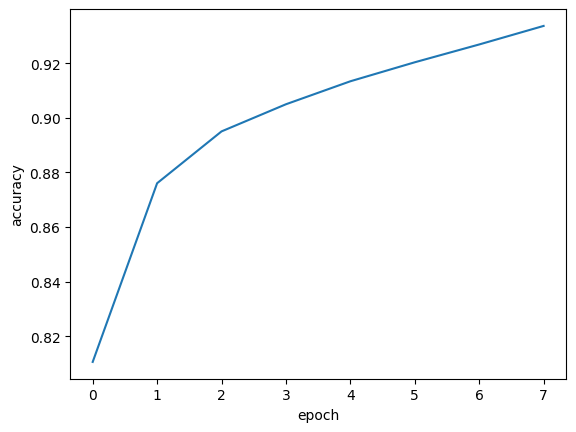

In [53]:
# 정확도를 출력해보기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

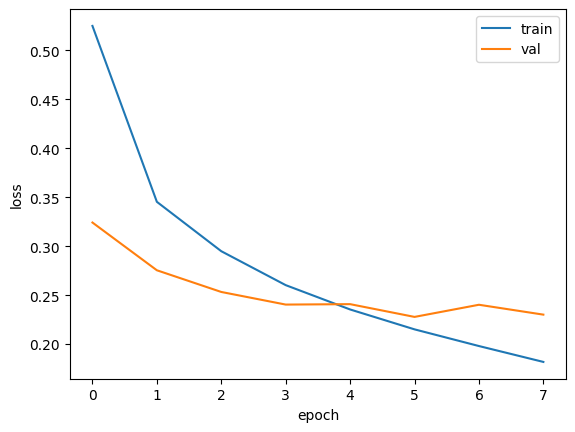

In [54]:
plt.plot(history.history['loss'])  #  training loss
plt.plot(history.history['val_loss']) # validataion loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [55]:
# 성능평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2242


[0.22777581214904785, 0.9181666374206543]

In [54]:
# ↑ EarlyStopping 콜백이 최상의 모델 파라미터로 복원했다

# 예측

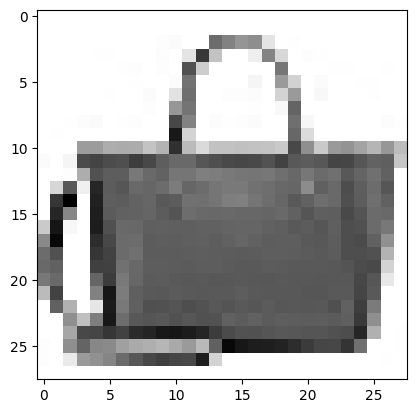

In [57]:
# 검증세트의 첫번째 샘플
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [58]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
[[5.9518716e-17 5.2423426e-23 7.5294332e-19 3.0363503e-16 5.6307561e-17
  1.9606524e-18 2.4531937e-18 8.9875973e-17 1.0000000e+00 1.3887841e-18]]


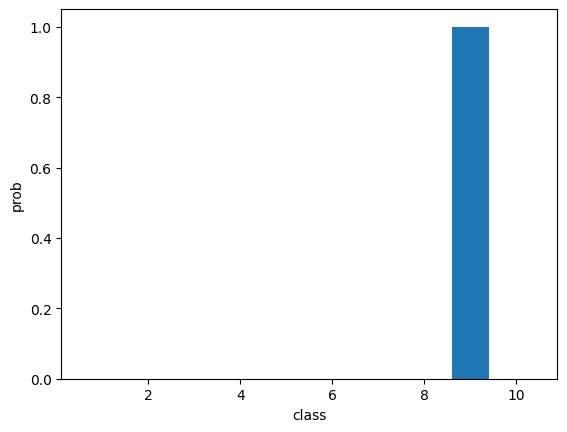

In [59]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [60]:
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [61]:
classes[np.argmax(preds)]

'Bag'

In [63]:
# 테스트 세트도 스케일링, shape 변경

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [64]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9126 - loss: 0.2597


[0.25273361802101135, 0.9117000102996826]

# 모델 저장

In [65]:
model.save('best-cnn-model.keras')

# 모델 불러오기

In [66]:
model = keras.models.load_model('best-cnn-model.keras')
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9126 - loss: 0.2597


[0.25273361802101135, 0.9117000102996826]

# 실제 데이터 적용 (예측)

In [67]:
base_path = r'/content/drive/MyDrive/DATA_SET/mnist_fashion'

In [68]:
from glob import glob
img_paths = glob(os.path.join(base_path, 'img_*.*'))
img_paths

['/content/drive/MyDrive/DATA_SET/mnist_fashion/img_shirt.jpg',
 '/content/drive/MyDrive/DATA_SET/mnist_fashion/img_ankle_boots.jpg',
 '/content/drive/MyDrive/DATA_SET/mnist_fashion/img_coat.jpg',
 '/content/drive/MyDrive/DATA_SET/mnist_fashion/img_sandal.png',
 '/content/drive/MyDrive/DATA_SET/mnist_fashion/img_pants.png']

In [69]:
from PIL import Image
import PIL.ImageOps as ops

In [70]:
file_path = img_paths[0]  # 첫번째 이미지

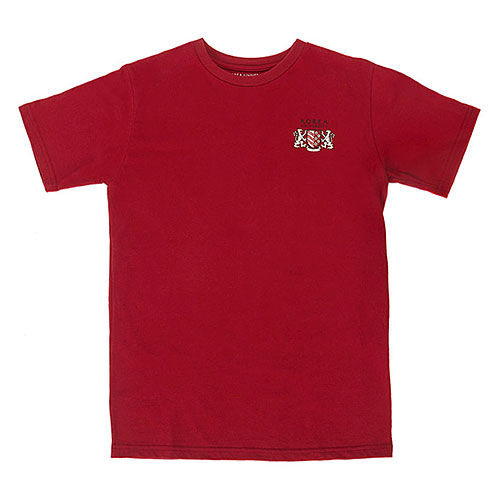

In [71]:
img = Image.open(file_path)
img

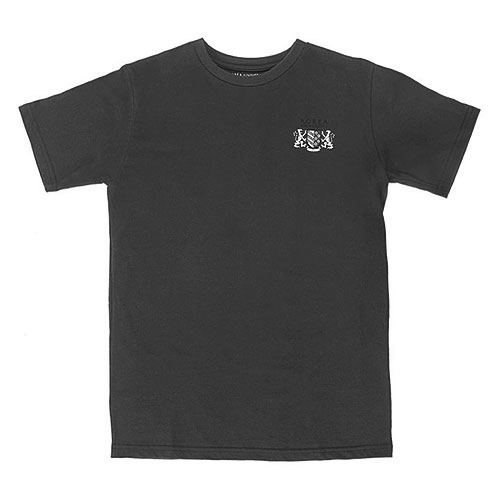

In [72]:
mono8img = img.convert('L')
mono8img

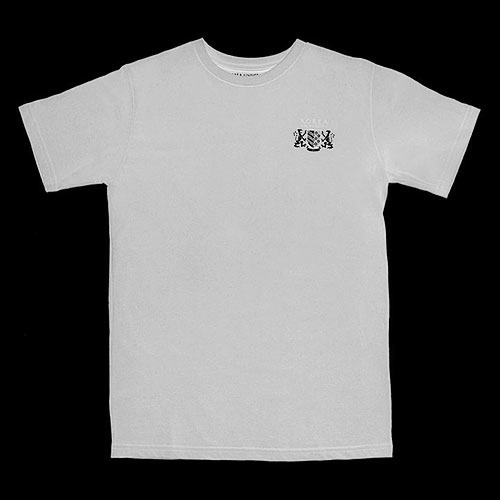

In [73]:
invImg = ops.invert(mono8img)
invImg

In [74]:
# reshape
resizeImg = invImg.resize((28, 28))
resizeImg

In [76]:
# 입력 shape 변환 -> (batch, height, width, channel)
data_arr = np.array(resizeImg).reshape(1, 28, 28, 1)
print(data_arr.shape)

(1, 28, 28, 1)


In [77]:
np.min(data_arr), np.max(data_arr)

(np.uint8(0), np.uint8(211))

In [78]:
data_scaled = data_arr / 255.0

np.min(data_scaled), np.max(data_scaled)

(np.float64(0.0), np.float64(0.8274509803921568))

In [79]:
preds = model.predict(data_scaled)
print(classes[np.argmax(preds)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
T-shirt/top


In [80]:
def predict(file_path):
  img = Image.open(file_path)
  mono8img = img.convert('L')
  invImg = ops.invert(mono8img)
  resizeImg = invImg.resize((28, 28))
  data_arr = np.array(resizeImg).reshape(1, 28, 28, 1)
  data_scaled = data_arr / 255.
  preds = model.predict(data_scaled)
  return classes[np.argmax(preds)]

In [81]:
for img_path in img_paths:
  print(img_path, '->', predict(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
/content/drive/MyDrive/DATA_SET/mnist_fashion/img_shirt.jpg -> T-shirt/top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
/content/drive/MyDrive/DATA_SET/mnist_fashion/img_ankle_boots.jpg -> Ankle boot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/drive/MyDrive/DATA_SET/mnist_fashion/img_coat.jpg -> Coat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
/content/drive/MyDrive/DATA_SET/mnist_fashion/img_sandal.png -> Sandal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
/content/drive/MyDrive/DATA_SET/mnist_fashion/img_pants.png -> Trouser


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


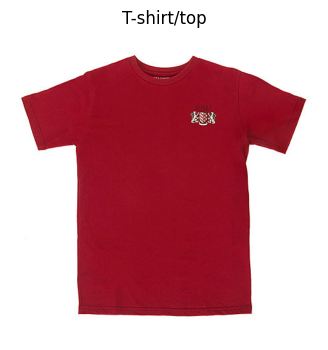

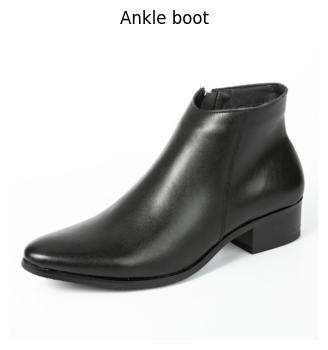

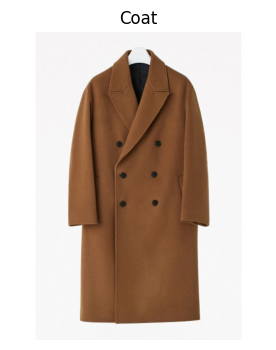

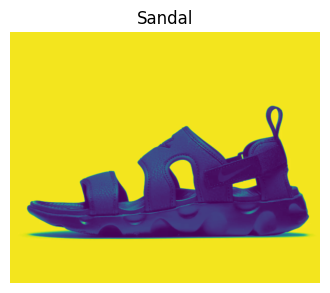

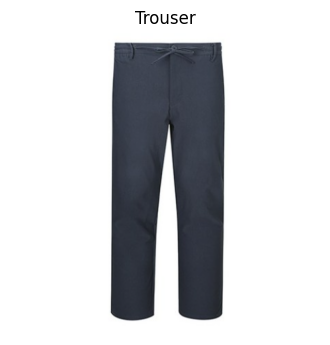

In [82]:
for img_path in img_paths:
  fig, ax = plt.subplots(1, 1, figsize=(4,4))
  ax.axis('off')

  ax.set_title(predict(img_path))
  arr = plt.imread(img_path)
  plt.imshow(arr)
